# Scale Invariant Feature Transform

In [2]:
import sys
import os
print("which python: ",sys.executable)
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
print("opencv version: ",cv2.__version__)
from IPython.core.pylabtools import figsize
figsize(16, 12)
from cyvlfeat.kmeans import kmeans
from scipy.spatial import distance
# from cyvlfeat.sift.dsift import dsift

which python:  /Users/huiminhan/opt/anaconda3/envs/opencv3/bin/python
opencv version:  3.4.2


In [4]:
image1 = cv2.imread('../CroppedImageData/Crop_batch1_labeled/croped_IMG_1792_ready_1.jpg')
image2 = cv2.imread('../CroppedImageData/Crop_batch1_labeled/croped_IMG_1802_late_87.jpg')
gray_image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
gray_image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

In [5]:
def sift_kp(image):
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d_SIFT.create()
    kp,des = sift.detectAndCompute(image, None)
    kp_image = cv2.drawKeypoints(image, kp, None)
    return kp_image,kp,des

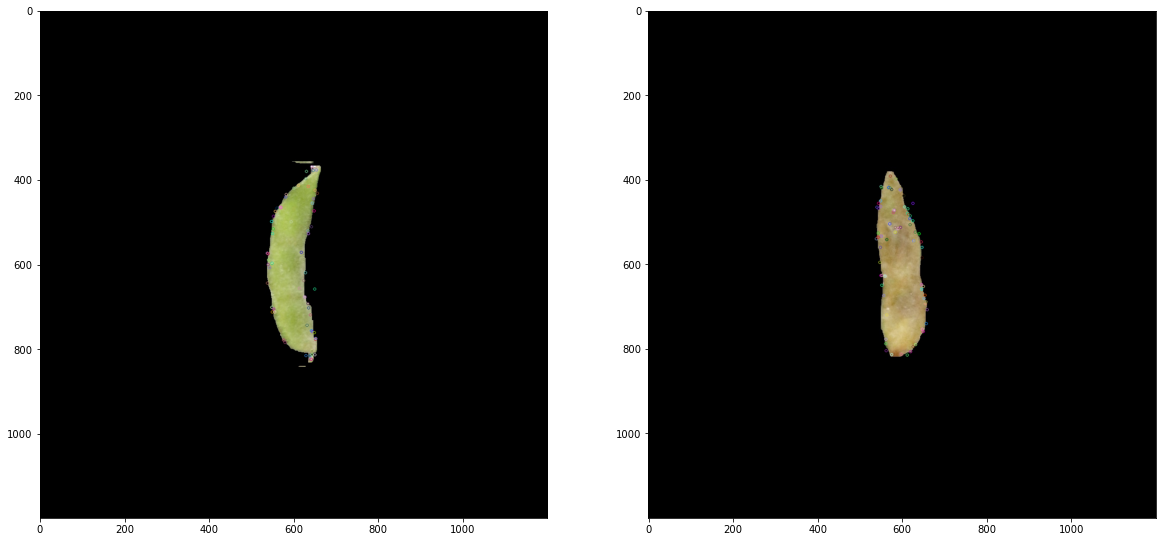

In [6]:
kp_image1,kp1, des1 = sift_kp(image1)
kp_image2,kp2, des2 = sift_kp(image2)
plt.figure(figsize = (20,16))
plt.subplot(121)
plt.imshow(cv2.cvtColor(kp_image1,cv2.COLOR_BGR2RGB))
plt.subplot(122)
plt.imshow(cv2.cvtColor(kp_image2,cv2.COLOR_BGR2RGB))

In [5]:
print(des1.shape)
print(des2.shape)

(344, 128)
(337, 128)


In [6]:
def get_clusters(inputDir, cluster_size, method="dsift"):
    bag_of_features = []
    for (path,dirname,filenames) in os.walk(inputDir):
        for imageName in filenames: 
#             print(imageName)
            img = cv2.imread(inputDir+imageName)
            if(method == "dsift"):
                _keypoints, descriptors = dsift(img, step=[5,5], fast=True) 
            elif(method == "orb"):
                orb = cv2.ORB_create()
                _keypoints, descriptors = orb.detectAndCompute(img, None)
            elif(method == "sift"):
                sift = cv2.xfeatures2d.SIFT_create()
                _keypoints, descriptors = sift.detectAndCompute(img, None)
            if descriptors is not None:
                  for des in descriptors:
                        bag_of_features.append(des)
        clusters = kmeans(np.array(bag_of_features).astype('float32'),
                          cluster_size, initialization="PLUSPLUS")
    return clusters

In [7]:
! rm ./testTrainingDataMix/.DS_Store

rm: ./testTrainingDataMix/.DS_Store: No such file or directory


In [8]:
feature_clusters = get_clusters('./testTrainingDataMix/', 512, method="sift")
feature_clusters

array([[4.22799988e+01, 2.70400009e+01, 2.39999995e-01, ...,
        6.00000024e-01, 1.91999996e+00, 5.76000023e+00],
       [8.03738296e-01, 9.34579410e-03, 0.00000000e+00, ...,
        5.23364484e-01, 9.15887833e-01, 7.66355133e+00],
       [1.56666670e+01, 8.33333358e-02, 0.00000000e+00, ...,
        3.75000000e-01, 2.08333328e-01, 5.00000000e-01],
       ...,
       [4.75999985e+01, 2.13333344e+00, 0.00000000e+00, ...,
        0.00000000e+00, 3.33333351e-02, 9.39999962e+00],
       [1.01166664e+02, 1.06777779e+02, 5.55555560e-02, ...,
        1.66666672e-01, 3.88888896e-01, 6.11111116e+00],
       [4.25000000e+00, 1.62500000e+01, 1.80000000e+01, ...,
        1.25000000e+01, 2.97500000e+01, 8.10000000e+01]], dtype=float32)

In [9]:
def image_histogram(image, feature_clusters, method="dsift"):
    img = cv2.imread(image)
    if(method == "dsift"):
        _keypoints, descriptors = dsift(img, step=[5,5], fast=True) 
    elif(method == "orb"):
        orb = cv2.ORB_create()
        _keypoints, descriptors = orb.detectAndCompute(img, None)
    elif(method == "sift"):
        sift = cv2.xfeatures2d.SIFT_create()
        _keypoints, descriptors = sift.detectAndCompute(img, None)

    dist = distance.cdist(feature_clusters, descriptors, metric='euclidean')
    
    # calculate distance between each SIFT features of this image and clusters
    idx = np.argmin(dist, axis=0)
    
    # make histogram
    hist, bin_edges = np.histogram(idx, bins=len(feature_clusters))
    hist_norm = [float(i)/sum(hist) for i in hist]
    return hist_norm

In [10]:
testImg = image_histogram('./testTrainingData2/croped_IMG_1808_1.jpg',feature_clusters,method='sift')
testImg

[0.005698005698005698,
 0.0,
 0.002849002849002849,
 0.0,
 0.0,
 0.008547008547008548,
 0.005698005698005698,
 0.0,
 0.005698005698005698,
 0.002849002849002849,
 0.002849002849002849,
 0.0,
 0.002849002849002849,
 0.0,
 0.0,
 0.0,
 0.002849002849002849,
 0.014245014245014245,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.005698005698005698,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.005698005698005698,
 0.0,
 0.0,
 0.0,
 0.002849002849002849,
 0.002849002849002849,
 0.0,
 0.0,
 0.002849002849002849,
 0.0,
 0.002849002849002849,
 0.0,
 0.002849002849002849,
 0.0,
 0.0,
 0.002849002849002849,
 0.0,
 0.0,
 0.0,
 0.002849002849002849,
 0.011396011396011397,
 0.005698005698005698,
 0.0,
 0.002849002849002849,
 0.0,
 0.002849002849002849,
 0.0,
 0.002849002849002849,
 0.0,
 0.005698005698005698,
 0.0,
 0.002849002849002849,
 0.0,
 0.002849002849002849,
 0.011396011396011397,
 0.014245014245014245,
 0.0,
 0.002849002849002849,
 0.008547008547008548,
 0.0,
 0.002849002849002849,
 0.0,
 0.0,
 0.0,
 0.005698005

In [11]:
def batchExtractSiftFeatures(inputDir,outputDir,filename):
    imread_failed = []
    features = []
    index = []
    df = pd.DataFrame(columns = range(1,513))
    feature_clusters = get_clusters(inputDir, 512, method="sift")
    for (path,dirname,filenames) in os.walk(inputDir):
        for image in filenames:
            try:
                src = path + image
                imgName = image.split('.')[0]
                img = cv2.imread(src)
                feature = image_histogram(src,feature_clusters,method='sift')
                features.append(feature)
                index.append(imgName)
                df = pd.DataFrame(features,columns = range(1,513),index = index)
                df.index.name = 'Image'
                if os.path.isdir(outputDir):
                    pass
                else:
                    os.mkdir(outputDir)
                df.to_csv(outputDir +filename+'_SiftFeatures.csv')
            except: 
                imread_failed.append(image)
    return df

In [12]:
df = batchExtractSiftFeatures('../testTrainingDataMix/','../csvFiles/','gray')
display(df)

,1,2,3,4,5,6,7,8,9,10,...,503,504,505,506,507,508,509,510,511,512
Image,,,,,,,,,,,,,,,,,,,,,
croped_IMG_1793_ready_73,0.002994,0.000000,0.000000,0.014970,0.000000,0.017964,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.002994,0.002994,0.000000,0.000000,0.002994,0.002994,0.000000,0.005988,0.002994
croped_IMG_1793_ready_77,0.007663,0.000000,0.000000,0.000000,0.007663,0.000000,0.003831,0.000000,0.007663,0.000000,...,0.000000,0.003831,0.000000,0.000000,0.007663,0.000000,0.003831,0.000000,0.003831,0.003831
croped_IMG_1793_ready_88,0.005420,0.000000,0.005420,0.005420,0.000000,0.002710,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.002710,0.008130,0.000000,0.002710,0.008130,0.010840,0.000000,0.002710
croped_IMG_1793_ready_89,0.002398,0.000000,0.000000,0.004796,0.000000,0.009592,0.000000,0.002398,0.004796,0.000000,...,0.002398,0.002398,0.000000,0.004796,0.000000,0.000000,0.002398,0.002398,0.000000,0.002398
croped_IMG_1793_ready_76,0.002141,0.000000,0.002141,0.006424,0.000000,0.000000,0.002141,0.002141,0.000000,0.002141,...,0.000000,0.000000,0.002141,0.000000,0.000000,0.000000,0.002141,0.008565,0.006424,0.002141
croped_IMG_1793_ready_74,0.006593,0.000000,0.002198,0.000000,0.002198,0.006593,0.000000,0.000000,0.006593,0.004396,...,0.002198,0.000000,0.002198,0.000000,0.000000,0.000000,0.002198,0.004396,0.002198,0.002198
croped_IMG_1793_ready_75,0.003145,0.006289,0.000000,0.006289,0.009434,0.003145,0.006289,0.000000,0.000000,0.003145,...,0.000000,0.000000,0.000000,0.009434,0.000000,0.000000,0.000000,0.003145,0.000000,0.003145
croped_IMG_1802_late_98,0.003425,0.006849,0.013699,0.000000,0.000000,0.003425,0.000000,0.003425,0.000000,0.000000,...,0.000000,0.000000,0.003425,0.000000,0.000000,0.000000,0.000000,0.003425,0.010274,0.003425
croped_IMG_1802_late_89,0.003546,0.000000,0.000000,0.003546,0.000000,0.000000,0.003546,0.000000,0.000000,0.000000,...,0.010638,0.000000,0.000000,0.000000,0.000000,0.017730,0.003546,0.000000,0.000000,0.003546


In [13]:
df.apply(lambda x: x.sum(), axis=1)

Image
croped_IMG_1793_ready_73    1.0
croped_IMG_1793_ready_77    1.0
croped_IMG_1793_ready_88    1.0
croped_IMG_1793_ready_89    1.0
croped_IMG_1793_ready_76    1.0
croped_IMG_1793_ready_74    1.0
croped_IMG_1793_ready_75    1.0
croped_IMG_1802_late_98     1.0
croped_IMG_1802_late_89     1.0
croped_IMG_1802_late_88     1.0
croped_IMG_1802_late_91     1.0
croped_IMG_1802_late_85     1.0
croped_IMG_1802_late_84     1.0
croped_IMG_1802_late_90     1.0
croped_IMG_1802_late_79     1.0
croped_IMG_1802_late_86     1.0
croped_IMG_1802_late_92     1.0
croped_IMG_1802_late_93     1.0
croped_IMG_1802_late_87     1.0
croped_IMG_1802_late_83     1.0
croped_IMG_1802_late_97     1.0
croped_IMG_1802_late_96     1.0
croped_IMG_1802_late_82     1.0
croped_IMG_1802_late_94     1.0
croped_IMG_1802_late_80     1.0
croped_IMG_1802_late_81     1.0
croped_IMG_1802_late_95     1.0
croped_IMG_1793_ready_78    1.0
croped_IMG_1793_ready_87    1.0
croped_IMG_1793_ready_93    1.0
croped_IMG_1793_ready_92    1.0
cr